In [1]:
Problem Statement:
1. Despite the continuous efforts of banks to attract and retain customers, the banking industry faces a persistent challenge in the form of customer churn, leading to financial losses and reduced customer satisfaction.
2. It is advantageous for banks to know what leads a client towards the decision to leave the company.

Project Objective:- 1. The aim of this project is to analyze the customer churn rate for bank because it is useful to understand why the customers leave.
2. After Analyzing we need to train a Machine Learning Model which can find the key factors that significantly influence the customer churn or attrition.
3. In the end will choose the most reliable model that will attach a probability to the churn to make it easier for customer service to target right customer in order to minimize their efforts to prevent customers churn.

Project Overview:
1. Churn refers to customers leaving a bank or discontinuing their banking services.
2. Banking Churn Analysis is a process of studying customer behavior in the banking industry to predict and understand customer attrition or churn.
3. Banking Churn Modeling aims to identify patterns and factors that contribute to customer churn, enabling banks to take proactive measures to retain customers and improve customer satisfaction.

SyntaxError: invalid syntax (277364599.py, line 1)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

In [19]:
df = pd.read_csv("./Churn_Modelling.csv")

In [21]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 10000
Total number of attributes/columns present in the dataset is: 14


In [ ]:
📊 Inference:

RowNumber: It is likely a unique identifier for each record and does not contribute directly to the analysis.
CustomerId: It can be used to track and differentiate individual customers within the dataset.
Surname: It provides information about the family name of each customer.
CreditScore: It is a numerical value that assesses the creditworthiness of an individual based on their credit history and financial behavior.
Geography: It provides information about the customers' geographic distribution, allowing for analysis based on regional or national factors.
Gender: It categorizes customers as either male or female, enabling gender-based analysis if relevant to the churn prediction.
Age: It represents the customer's age in years and can be used to analyze age-related patterns and behaviors.
Tenure: It typically represents the number of years or months the customer has been associated with the bank.
Balance: It reflects the amount of money in the customer's bank account at a specific point in time.
NumOfProducts: It can include various offerings such as savings accounts, loans, credit cards, etc.
HasCrCard: It is a binary variable with a value of 1 if the customer possesses a credit card and 0 otherwise.
IsActiveMember: It is a binary variable indicating whether the customer is an active member (1) or not (0) within the bank.
EstimatedSalary: It provides an approximation of the customer's income level, which can be relevant for analyzing churn behavior.
Exited: It indicates whether a customer has churned (1) or not (0) from the bank. It is the variable we aim to predict using the other features.

In [25]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [ ]:
Inference:

Surname column: is having very high cardinality and not relevant for predicting customer churned or not. So we can simply drop this feature.
Geography & Gender Columns are having low cardinality and seems relevant for predicting customer churned or not.

In [ ]:
Data Wrangling

In [ ]:
Inference:

RowNumber and CustomerId columns represents a unique value for each customer and doesn't seem relevant for predicting customer churned or not.
Surname column is having high cardinality* and doesn't seems relevant for predicting customer churned or not.**
So we can simply drop these features.

In [27]:
#Dropping insignificant features
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [29]:
#Renaming Target Variable name and its values with more appropirate values for better Analysis.

df.rename(columns={"Exited":"Churned"},inplace=True)
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

In [ ]:
Inference:

* We have **converted raw data** into **well-structured data** to better analysis. * So we can perform **Expolatory Data Analysis** and **derive insights from the data.**

In [ ]:
Explorator Data Analysis

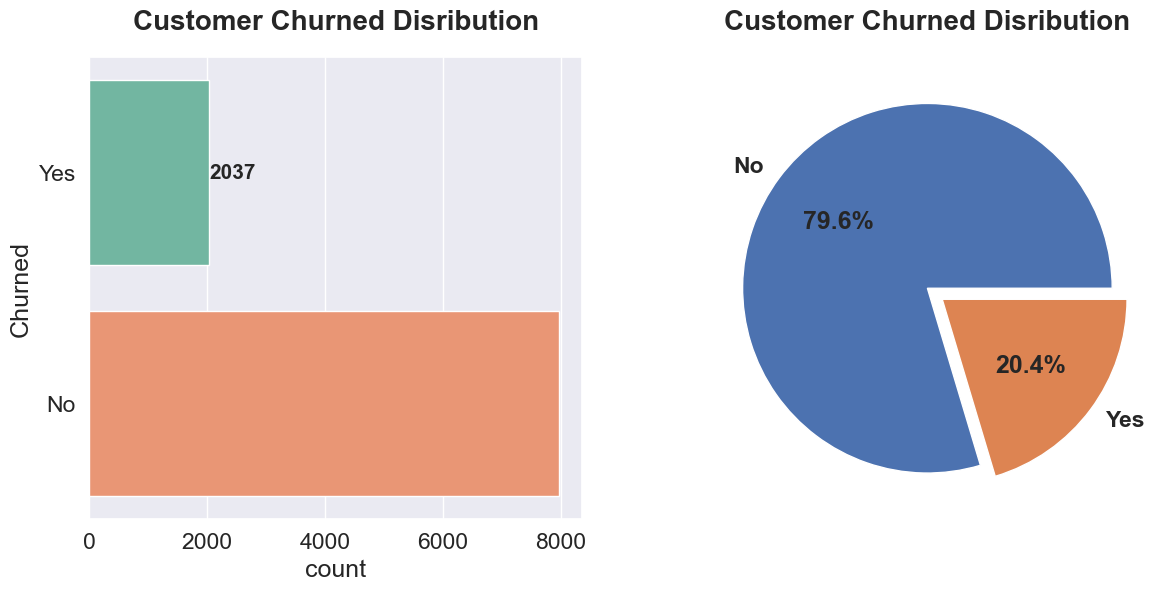

In [31]:
count = df["Churned"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(df["Churned"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [ ]:
Inference:

There is huge class-imbalance which can lead to bias in model performance.
So to overcome this class-imbalance we have to use over-sampling technique from SMOTE.

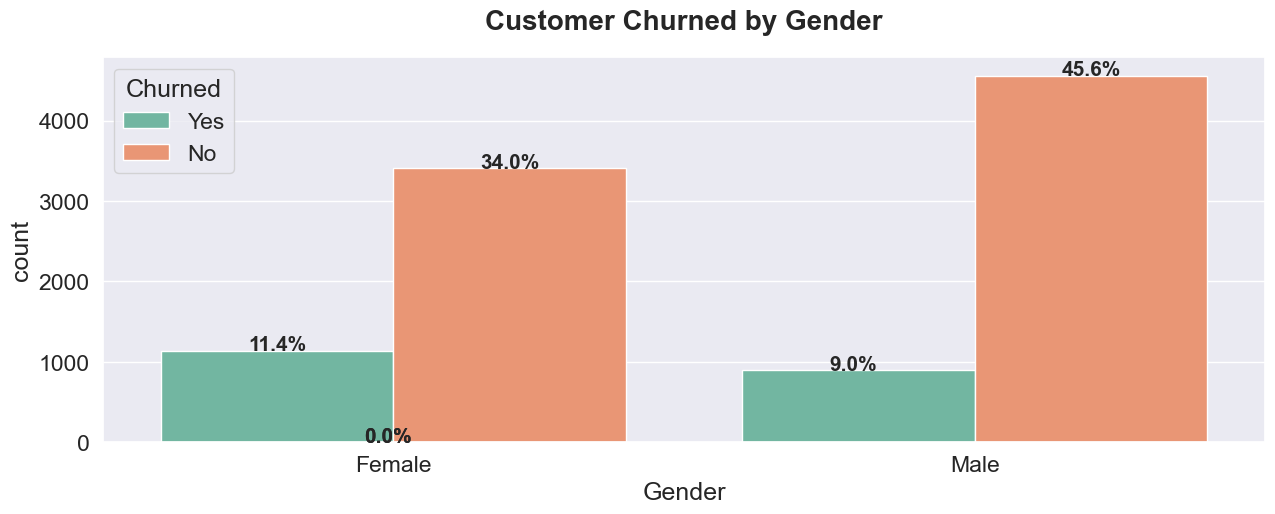

In [35]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()
countplot("Gender")

In [ ]:
 Inference:

The churned probabillity is more for Feamle Customers compared to male customers.
Which means female customers are more deactivating their banking facilities compared to male customers.
📊 Recommendation:

Bank can Develop targeted marketing campaigns specifically tailored to female customers.
Bank can Focus on enhancing the overall customer experience for female customers.

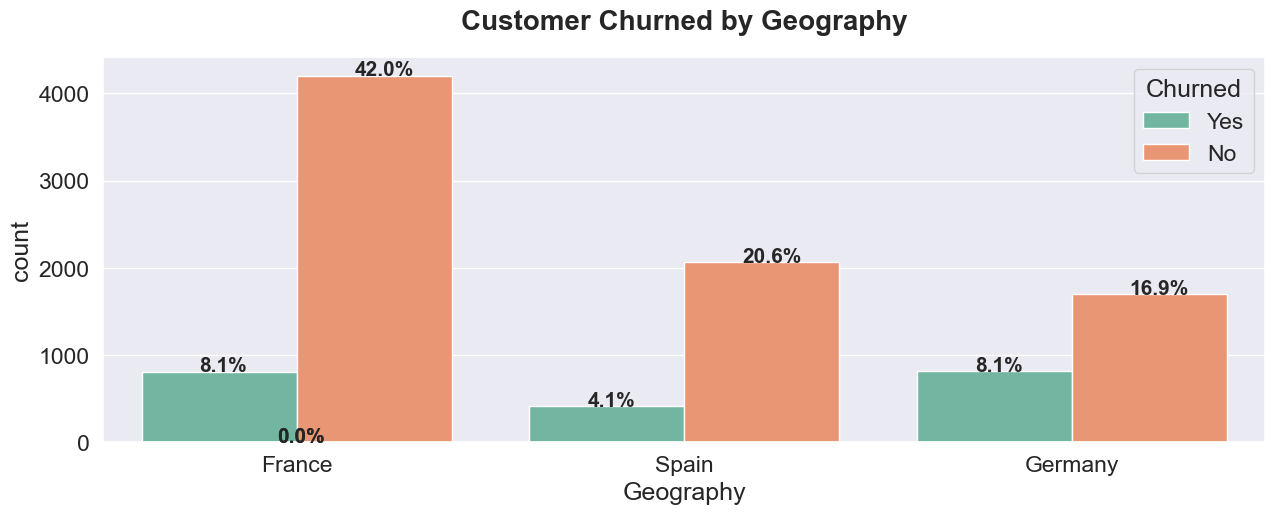

In [37]:
countplot("Geography")

In [ ]:
📊 Inference:

Half of the customers are from France followed by Germany and Spain.
Despite of the huge total customers difference between France & Germany the churned rate for France and Germany customers are same.
There are almost equal customers from Spain & Germany, but the Churn rate is almost double in Germany when compared with spain.
📊 Recommendation:

Bank can analyze the banking facilites & behaviour of customers from france and try to implement those on Germany customers.

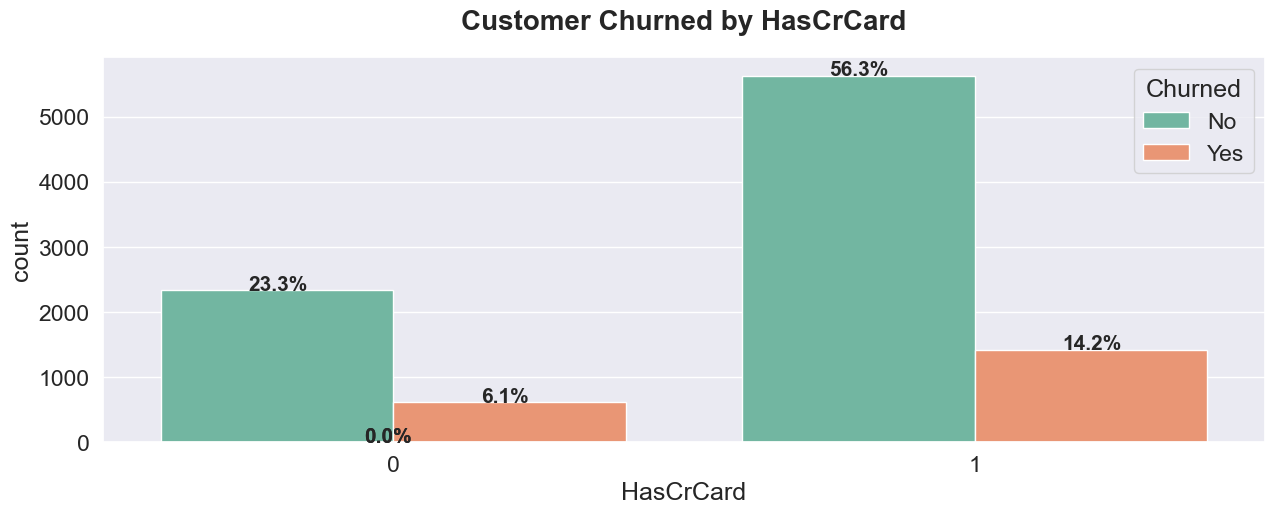

In [39]:
countplot("HasCrCard")

In [ ]:
📊 Inference:

More than 70% of customers are having credit card.
The churn probability value for the both the categories is almost 1:4.
So credit card is not affecting the churn of customers.

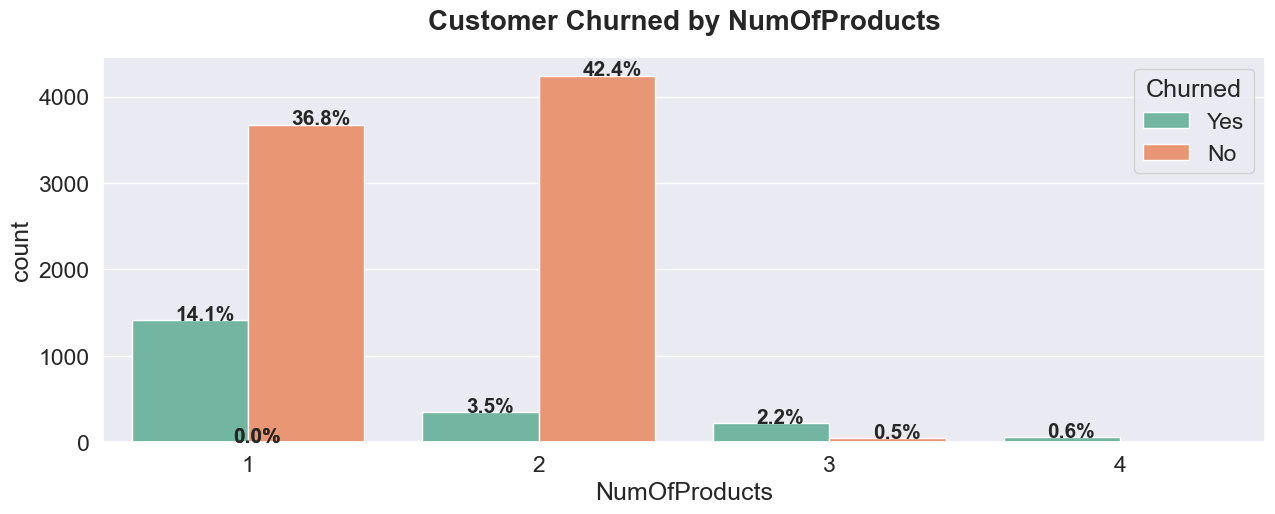

In [41]:
countplot("NumOfProducts")

In [ ]:
📊 Inference:

Most of the customers are having either 1 or 2 total number of banking products.
Very few customers are having more than 2 total number of banking products.
The lowest churn rate is with customers having only 2 products.
There is very high churn rate in customers having 1 product or more than 2 products.
Note:
We can do feature engineering by grouping the customers having products more than 2 together to reduce the class imbalance.
Because Class Imbalance leads to bias in model and misrepresentation of minority class.
📊 Recommendation:

The bank can try to convince the customers to have atleast 2 banking products.
They can provide Rewards and Incentives to the customers having atleast 2 banking products.

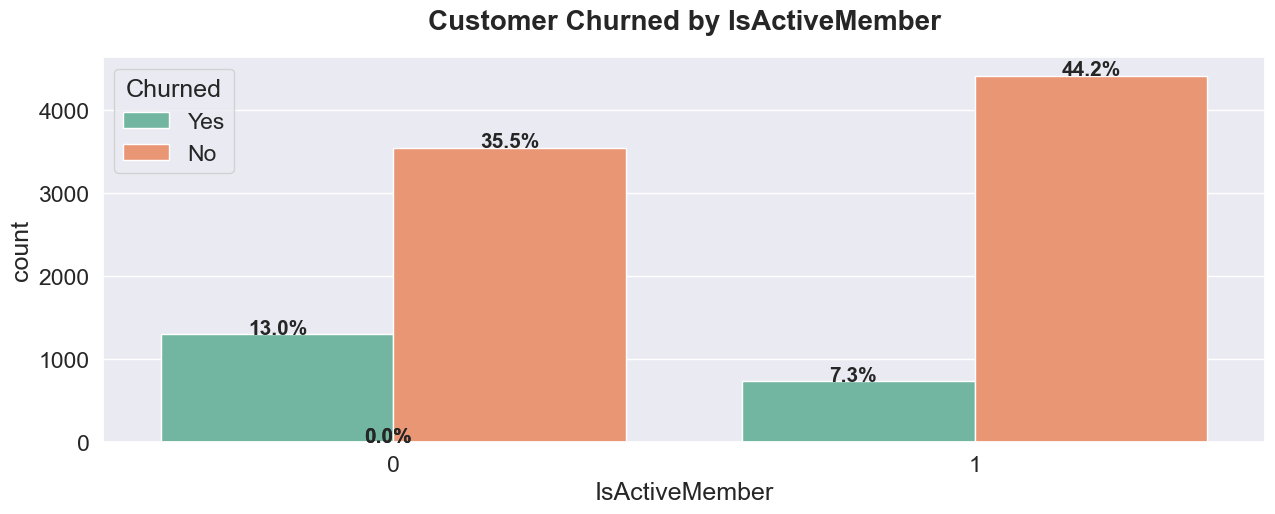

In [43]:
countplot("IsActiveMember")

In [ ]:
📊 Inference:

There is approxiamately equal customer who are either active or not active.
But the churn rate % in not active customers is almost double compared to active customers.
So customers which are not active are morely likely to deactivate their banking facilities.
📊 Recommendation:

Bank can provide Regular Communication and Updates, and Enhanced Digital Services so that customers remain active to the banking facilities.

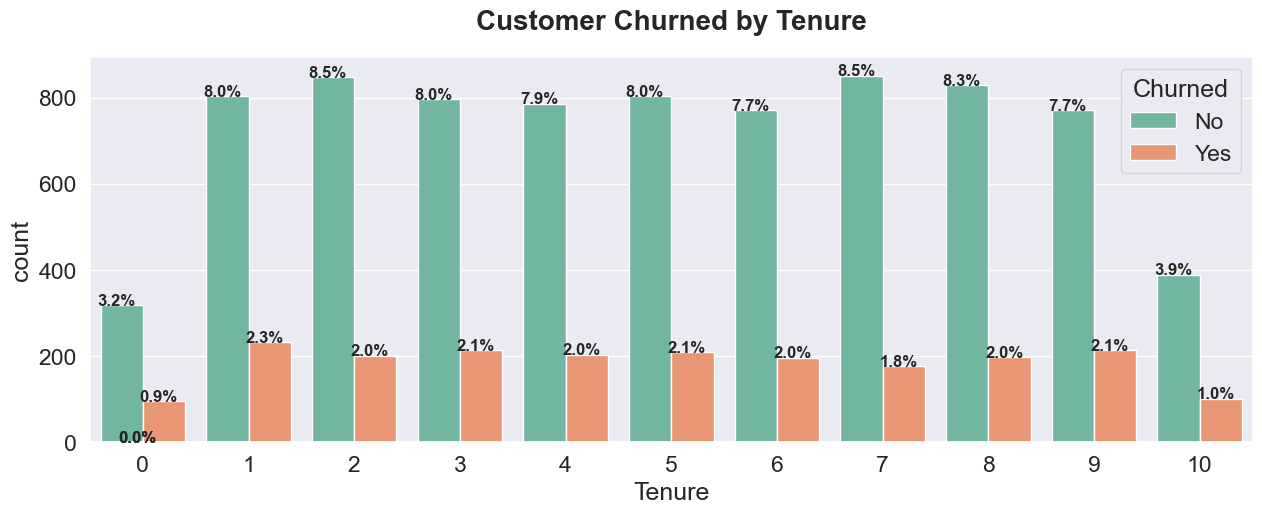

In [45]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Tenure", data=df, hue="Churned",palette="Set2")
for value in ax.patches:
    percentage = "{:.1f}%".format(100*value.get_height()/len(df["Tenure"]))
    x = value.get_x() + value.get_width() / 2 - 0.05
    y = value.get_y() + value.get_height()
    ax.annotate(percentage, (x,y), fontweight="black",size=12, ha="center")

plt.title("Customer Churned by Tenure",fontweight="black",size=20,pad=20)
plt.show()

In [ ]:
📊 Inference:

The highest tenure is 10 years which means that those customers have opened their account 10 years back.
Since there is almost similar distribution of churn status we can't make any specific inference.

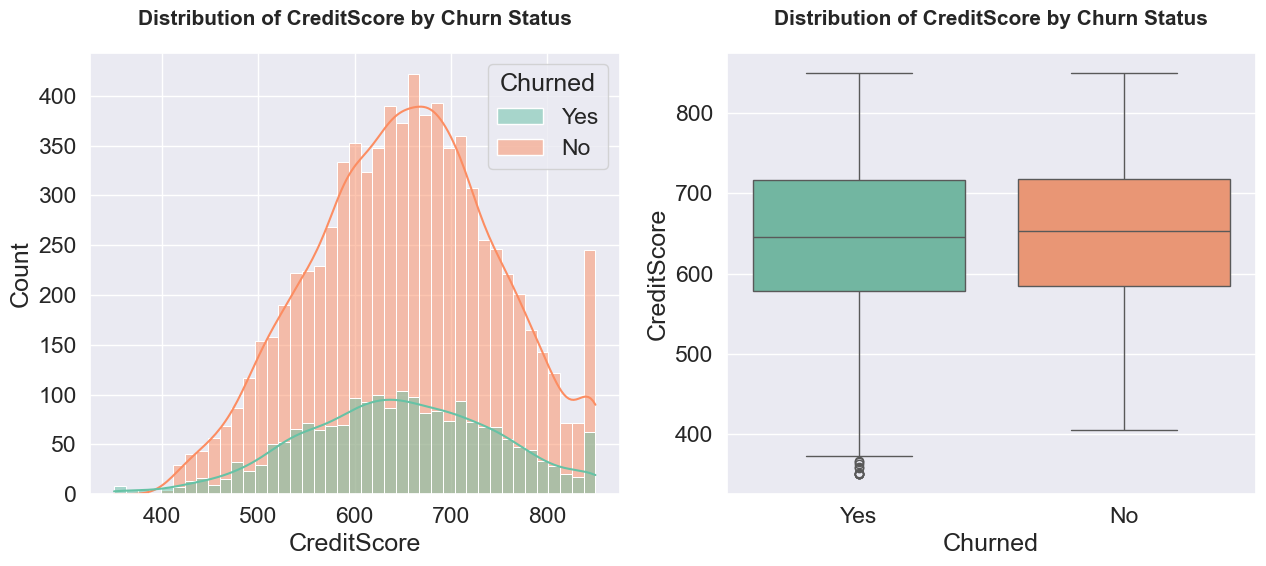

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

def continous_plot(column):
    plt.figure(figsize=(13,6))
    
    # Plot the distribution of the continuous variable with hue based on "Churned"
    plt.subplot(1,2,1)
    sns.histplot(x=column, hue="Churned", data=df, kde=True, palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

    # Plot the boxplot for the continuous variable vs 'Churned' status
    plt.subplot(1,2,2)
    sns.boxplot(x="Churned", y=column, data=df, palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

    plt.tight_layout()
    plt.show()

# Example usage
continous_plot("CreditScore")


In [ ]:
📊 Inference:

The Median CreditScore of both churned and not churned customers are approxiamately equal.
Since the values are approximately equal for both churn status we can't generate any relevant inference.

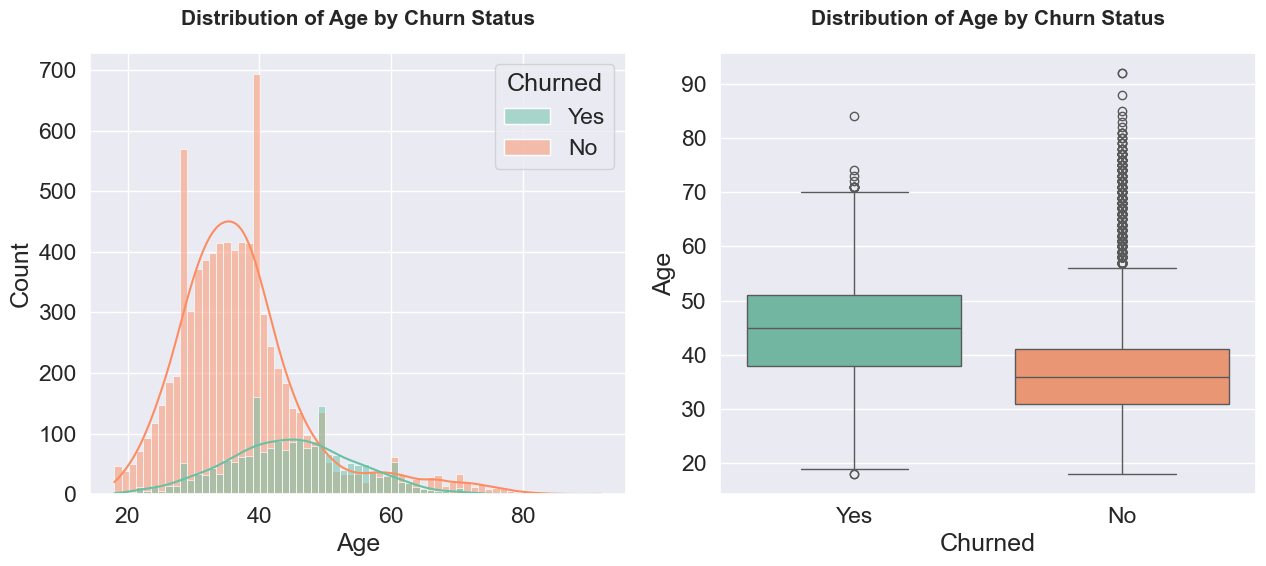

In [53]:
continous_plot("Age")

In [ ]:
📊 Inference:

The distribution is right skewed because of presence of outliers which can lead to overfitting in model.
To overcome this right-skewed distribution we can use log normal transformation technique to bring a normal distribution.

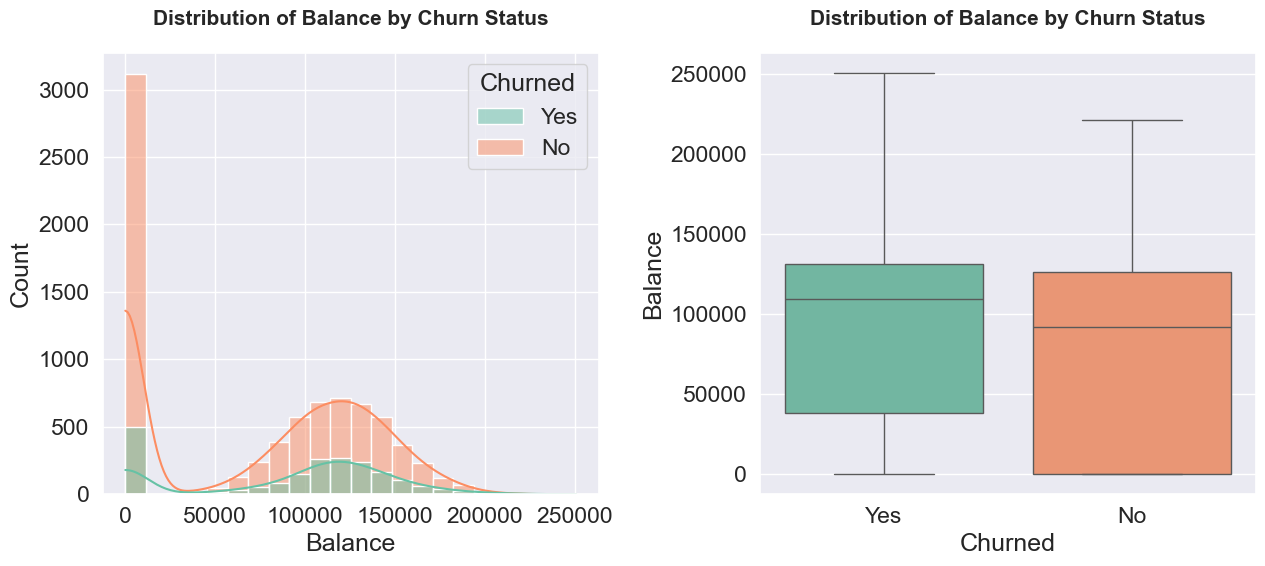

In [55]:
continous_plot("Balance")

In [ ]:
📊 Inference:

More than 3000 customers are having their account balance equal to zero.
Customers with zero balance are more likely to deactivate their account.
Excluding the zero value we can observe a normal distribution. So don't have to use any other techniques.
Note:-
We can do Feature Engineering by grouping the customers with account balance equal to 0 and balance more than 0 separately.

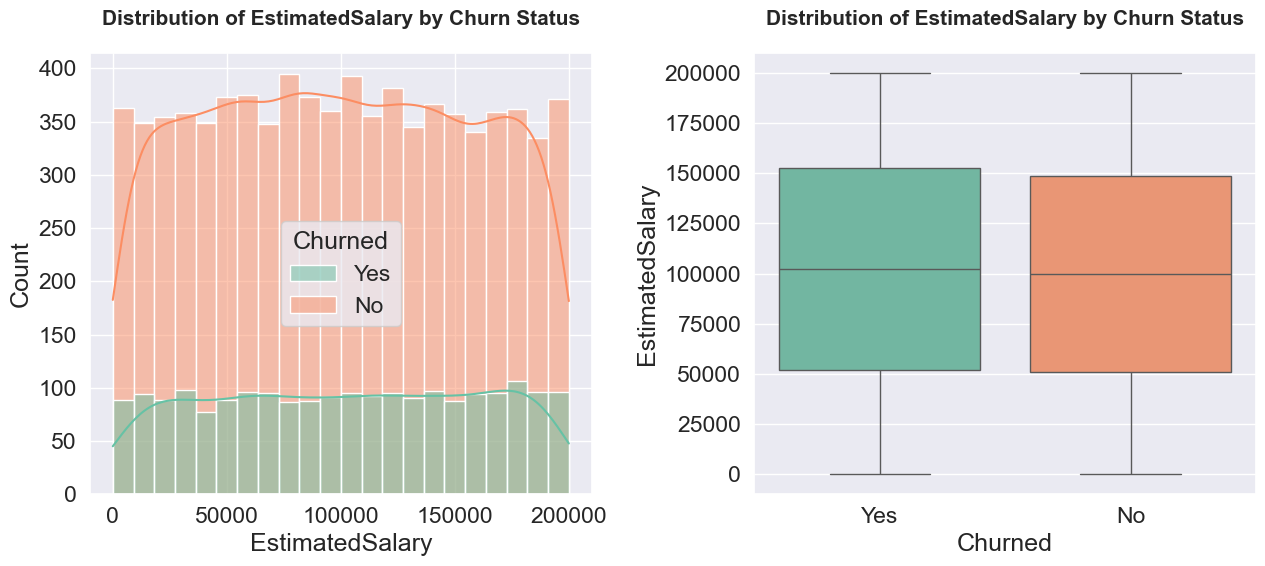

In [57]:
continous_plot("EstimatedSalary")

In [ ]:
📊 Inference:

The median value of EstimatedSalary is approxiamately same for both the churned categories.
Since the distribution is kind of similar for both churn category we can't make any relevant inference.

In [ ]:
Feature Engineering

In [59]:
conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values =     ["One product","Two Products","More Than 2 Products"]

In [61]:
df["Total_Products"] = np.select(conditions,values)

In [63]:
df.drop(columns="NumOfProducts", inplace=True)

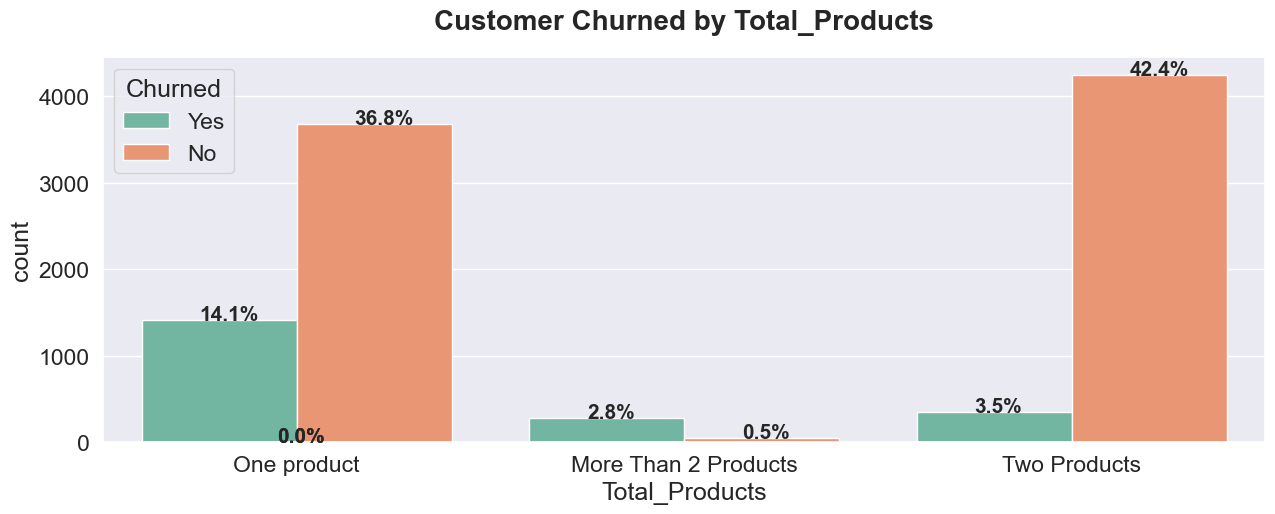

In [65]:
countplot("Total_Products")

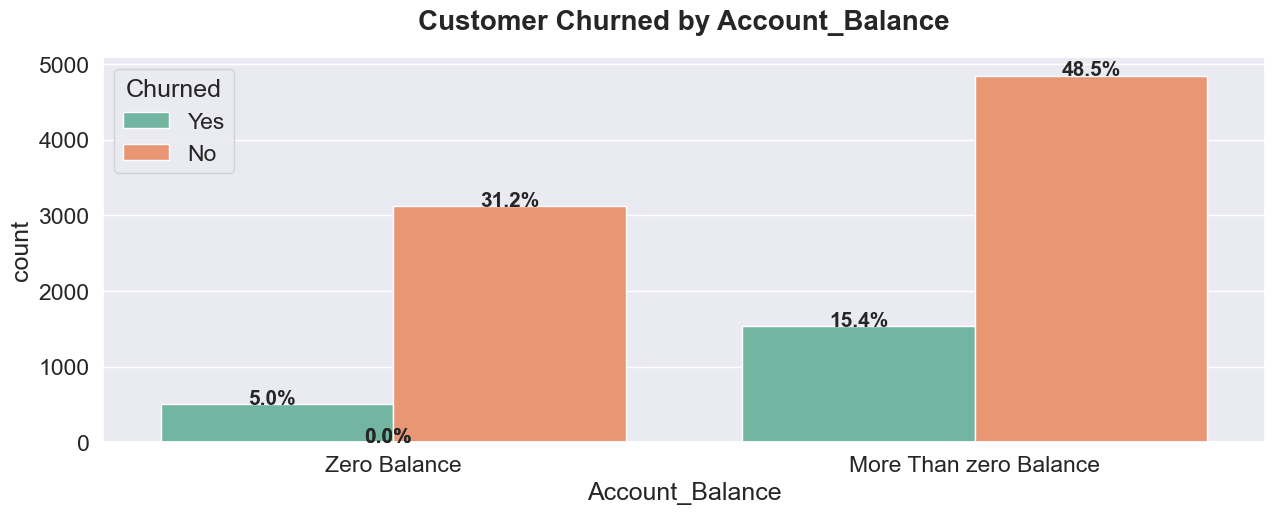

In [67]:
conditions = [(df["Balance"]==0), (df["Balance"]>0)]
values = ["Zero Balance","More Than zero Balance"]
df["Account_Balance"] = np.select(conditions, values)
df.drop(columns="Balance",inplace=True)
countplot("Account_Balance")

In [69]:
#Computing Unique Values of Categorical Columns.
cat_cols = ["Geography","Gender","Total_Products","Account_Balance"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")

df = pd.get_dummies(columns=cat_cols, data=df)
df["Churned"].replace({"No":0,"Yes":1},inplace=True)
df.head()

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

Unique Values in Total_Products column is: ['One product' 'More Than 2 Products' 'Two Products']
---------------------------------------------------------------------------------------------------- 

Unique Values in Account_Balance column is: ['Zero Balance' 'More Than zero Balance']
---------------------------------------------------------------------------------------------------- 



,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,1,True,False,False,True,False,False,True,False,False,True
1,608,41,1,0,1,112542.58,0,False,False,True,True,False,False,True,False,True,False
2,502,42,8,1,0,113931.57,1,True,False,False,True,False,True,False,False,True,False
3,699,39,1,0,0,93826.63,0,True,False,False,True,False,False,False,True,False,True
4,850,43,2,1,1,79084.10,0,False,False,True,True,False,False,True,False,True,False


In [71]:
cols = ["CreditScore","Age","EstimatedSalary"]
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})


,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


In [ ]:
📊 Inference:

Age Feature is highly right-skewed , which conveys that there is presence of positive outliers.
Skewness can negatively impact the performance of certain machine learning algorithms, like DecisionTree & Linear Models.
To overcome the right-skewed distribution we can use log normal transformation to achieve a normal distribution.

In [73]:
#transformation
old_age = df["Age"]     ##Storing the previous Age values to compare these values with the transformed values.
df["Age"] = np.log(df["Age"])


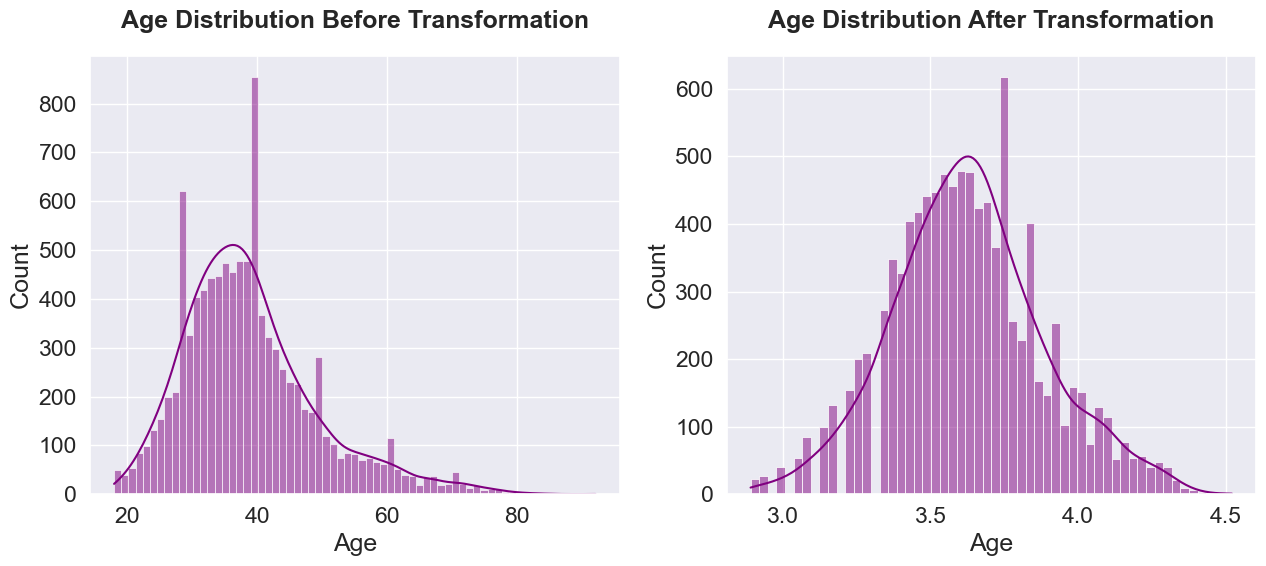

In [75]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="purple", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="purple", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

In [77]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

In [79]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [81]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 16)
Shape of x_test is:  (2000, 16)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


In [83]:
smt = SMOTE(random_state=42)

In [85]:
x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)

In [87]:
print(x_train_resampled.shape ,y_train_resampled.shape)

(12736, 16) (12736,)


In [89]:
#odel Creation using DecisionTree

In [91]:
dtree = DecisionTreeClassifier()

In [95]:

param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}

In [97]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [99]:
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters

Best Parameters for DecisionTree Model is:




{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'random_state': 0,
 'splitter': 'random'}

In [101]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=10, min_samples_split=8, random_state=0,
                       splitter='random')

In [103]:
y_train_pred = dtree.predict(x_train_resampled)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 89.85 %
Accuracy Score of Model on Testing Data  is => 83.65 %


In [105]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.8365
Recall Score of the Model is => 0.8365
Precision Score of the Model is => 0.8365


In [107]:
📊 Inference:

We can observe that recall, precision, and F1 score are all the same, it means that our model is achieving perfect balance between correctly identifying positive samples (recall) and minimizing false positives (precision).
The high values for F1 score, recall score, and precision score, all of which are approximately 0.8. These metrics suggest that the model achieves good accuracy in predicting the positive class.

SyntaxError: invalid character '📊' (U+1F4CA) (3327442710.py, line 1)

In [109]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtree.feature_importances_})


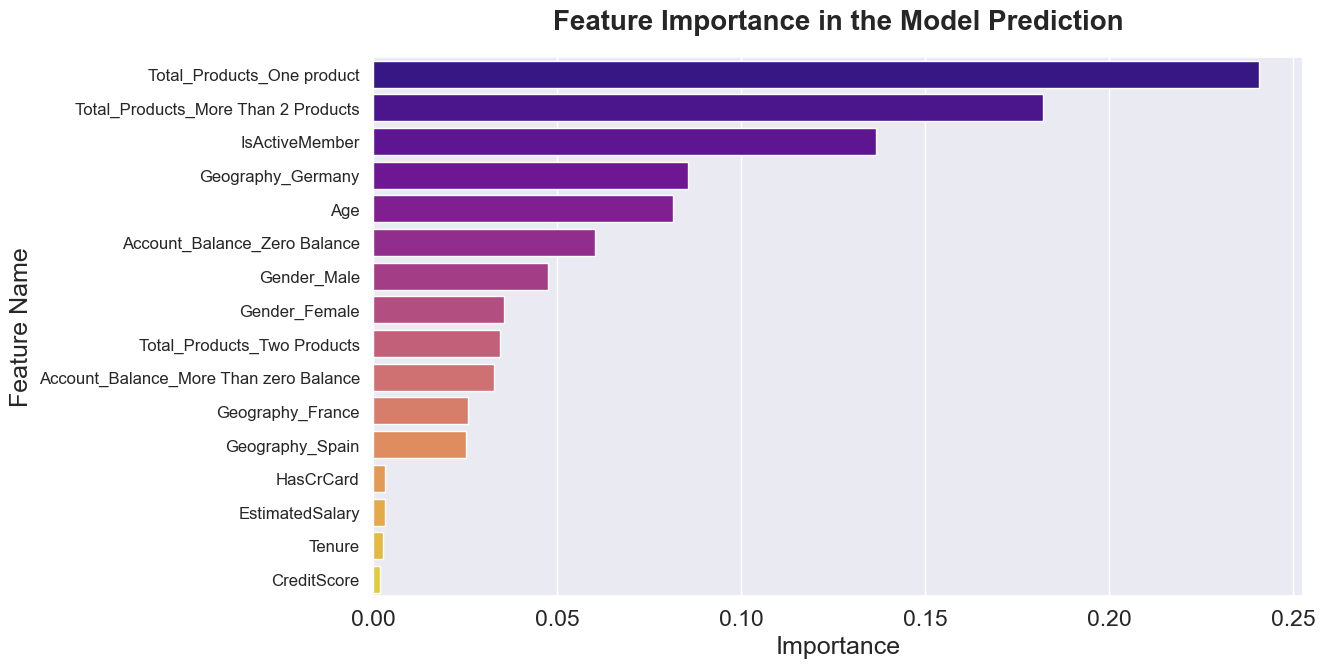

In [111]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

In [ ]:
📊 Inference:

The key factors that significantly influence the deactivation of customers banking facilities are:-
Total_Products, Age, IsActiveMember, Geography, Balance and Gender.
The minimal impact of features on the deactivation of customers' banking facilities are:-
CreditScore, HasCrCard, Tenure and EstimatedSalary

In [ ]:
📊 Key-Points

The key factors that significantly influence the deactivation of customers banking facilities are Total_Products, Age, IsActiveMember, Gender and Geography.
High Training and Testing Accuracies: Both the model achieved a high accuracy score near to 90% on the training data, indicating a good fit to the training instances. Additionally, the model's accuracy score near to 85% on the testing data suggests its ability to generalize well to unseen instances.
High F1 Score, Recall, and Precision: The model achieved high F1 score, recall, and precision values, all approximately 0.8. This indicates that the model has a strong ability to correctly identify positive cases while minimizing false positives and maximizing true positives.
High AUC value more than 0.8, states that the model demonstrates a reasonably good discriminatory power. It suggests that the model is able to distinguish between positive and negative instances with a relatively high degree of accuracy.
Overall Model Performance: The model demonstrates strong performance across multiple evaluation metrics, indicating its effectiveness in making accurate predictions and capturing the desired outcomes.
📊 Recommendations

The bank can try to convince the customers to have atleast 2 banking products but not less than 2.
The bank can launch a scheme for customers with higher ages (Senior Citizens) so that they not deactivate their banking facilities.
The bank can provide Rewards and Incentive Programs, Regular Communication and Updates, and Enhanced Digital Services so that customers remain active to the banking facilities.

In [121]:
!pip freeze


aext-assistant @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_5blio7a88h/croot/aext-assistant_1717062156186/work
aext-assistant-server @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_84ykzx_q85/croot/aext-assistant-server_1717059976819/work
aext-core @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_6230gwvics/croot/aext-core_1717056412538/work
aext-core-server @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_8eywdkec83/croot/aext-core-server_1717075040870/work
aext-panels @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_70wky0p3yf/croot/aext-panels_1717062185397/work
aext-panels-server @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_ce_grc3i0p/croot/aext-panels-server_1717060164537/work
aext-share-notebook @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_72nt4kju8z/croot/aext-share-notebook_1717059289451/work
aext-share-notebook-server @

In [123]:
!pip freeze > requirements.txt
